Successfully loaded data from: C:/Users/joshu/OneDrive/Desktop/ApplesML/data/Detect-GD.xlsx
                 Sample Condition Age Source  11995.49  11991.63  11987.78  \
0  GD-ch-bruise1.5h-10a         B  1h     S1 -0.083126 -0.082581 -0.082173   
1  GD-ch-bruise1.5h-10b         B  1h     S1 -0.154684 -0.154762 -0.154668   
2  GD-ch-bruise1.5h-10c         S  1h     S1 -0.066006 -0.065688 -0.065200   
3  GD-ch-bruise1.5h-10d         S  1h     S1 -0.110366 -0.110041 -0.109542   
4  GD-ch-bruise1.5h-11a         B  1h     S1 -0.142115 -0.141852 -0.141603   

   11983.92  11980.06  11976.21  ...  4034.497   4030.64  4026.783  4022.926  \
0 -0.081704 -0.081251 -0.080829  ...  1.208914  1.216652  1.219303  1.207366   
1 -0.154153 -0.153504 -0.153067  ...  0.744595  0.745167  0.743545  0.744555   
2 -0.064603 -0.064006 -0.063497  ...  1.443587  1.456797  1.474139  1.478318   
3 -0.109117 -0.108661 -0.108094  ...  1.257423  1.262108  1.269531  1.262279   
4 -0.141129 -0.140701 -0.140477  ...  0

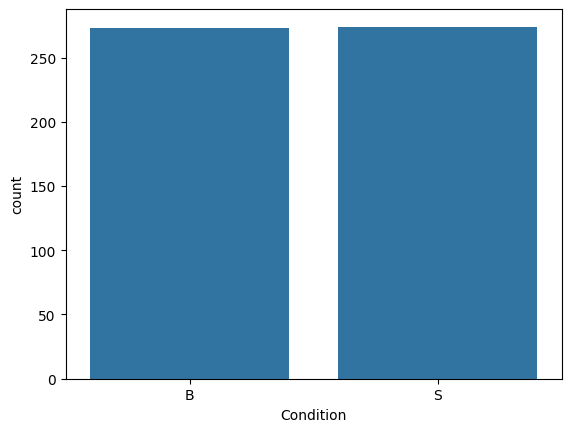

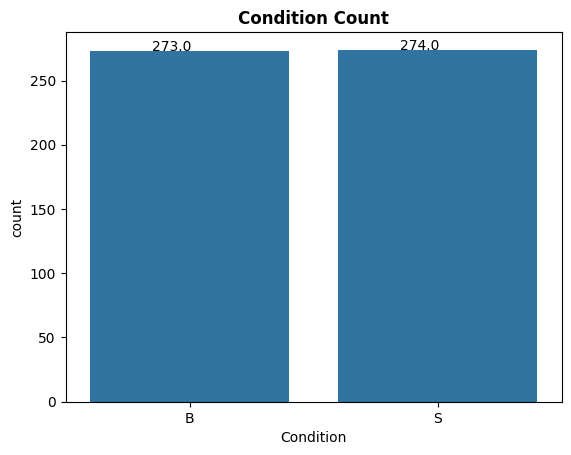

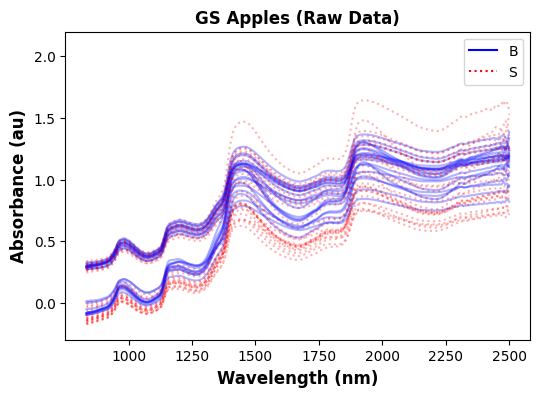

Stored 'X' (DataFrame)
Stored 'Y' (Series)
Stored 'df' (DataFrame)


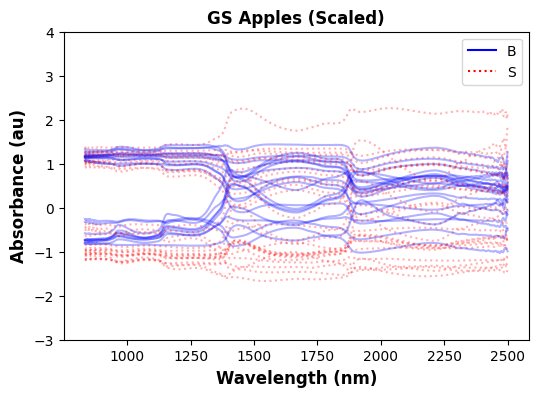

(547, 2074)
0      0
1      0
2      1
3      1
4      0
      ..
542    1
543    0
544    0
545    1
546    1
Name: Condition, Length: 547, dtype: int64
Train shapes: (382, 2074) (382,)
Accuracy score is 0.8787878787878788
Precision score is 0.8461538461538461


In [ ]:
# Granny Smith Apples (GS)

# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import os


# Load Excel Data
file_path = 'C:/Users/joshu/OneDrive/Desktop/ApplesML/data/Detect-GS.xlsx'
df = pd.read_excel(file_path)
print(f"Successfully loaded data from: {file_path}")


# View first 5 rows
print(df.head())


# Shape of dataset
df_shape = df.shape
print(f"The shape of the infrared intensity data is {df_shape}")
print(f"Where {df_shape[0]} is the number of rows, and {df_shape[1]} is the number of columns.")


# Convert wavenumbers to wavelengths
wavenumbers = np.float64(df.columns[4:])
wavelengths = (1 / wavenumbers) * 1e7
print(f"\nExample: wave number {wavenumbers[0]} in inverse centimeters converts to a wavelength of {wavelengths[0]} nm\n")
df.columns.values[4:] = np.round(wavelengths, 3)
print(df.head())


# Condition Count
ax = sns.countplot(x="Condition", data=df)
plt.show()


# Normalize Condition column (make uppercase)
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + 0.25, p.get_height() + 0.01))

plt.title("Condition Count", fontsize=12, fontweight='bold')
plt.show()


# Features (X) and Labels (Y)
X = df.iloc[:, 4:]
Y = df['Condition']

np.random.seed(42)
n = 50
randIx = np.random.choice(len(df), n, replace=False)



# Convert to numpy arrays
Xn = X.to_numpy(dtype='float')[randIx, :]
Yn = Y.to_numpy(dtype='str')[randIx]

S_Flag = (Yn == 'S')
B_Flag = (Yn == 'B')


# Plot before scaling (Fixed)
plt.figure(figsize=(6, 4))
for i in range(n):
    if B_Flag[i]:
        plt.plot(X.columns, Xn[i], 'b-', alpha=0.3)
    elif S_Flag[i]:
        plt.plot(X.columns, Xn[i], 'r:', alpha=0.3)
plt.plot([], [], 'b-', label='B')
plt.plot([], [], 'r:', label='S')
plt.title("GS Apples (Raw Data)", fontsize=12, fontweight='bold')
plt.xlabel("Wavelength (nm)", fontsize=12, fontweight='bold')
plt.ylabel("Absorbance (au)", fontsize=12, fontweight='bold')
plt.ylim([-0.3, 2.2])
plt.legend()
plt.show()




# Scaling Inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)




# Store variables to reuse in second notebook
%store X
%store Y
%store df



# Plot after scaling (Fixed)
Xn = X.to_numpy(dtype='float')[randIx, :]
Yn = Y.to_numpy(dtype='str')[randIx]
S_Flag = (Yn == 'S')
B_Flag = (Yn == 'B')

plt.figure(figsize=(6, 4))
for i in range(n):
    if B_Flag[i]:
        plt.plot(X.columns, Xn[i], 'b-', alpha=0.3)
    elif S_Flag[i]:
        plt.plot(X.columns, Xn[i], 'r:', alpha=0.3)
plt.plot([], [], 'b-', label='B')
plt.plot([], [], 'r:', label='S')
plt.title("GS Apples (Scaled)", fontsize=12, fontweight='bold')
plt.xlabel("Wavelength (nm)", fontsize=12, fontweight='bold')
plt.ylabel("Absorbance (au)", fontsize=12, fontweight='bold')
plt.ylim([-3, 4])
plt.legend()
plt.show()




# Granny Smith Apples 2 (GS)

# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

import sys
sys.path.append("..")
from source.utils import split 

# Restore stored variables from previous notebook
%store -r X
%store -r Y
%store -r df

print(X.shape) 

# Convert target labels to binary
Y = Y.map({'S': 1, 'B': 0})
print(Y)

# Train/test split
Xtrain, Xtest, Ytrain, Ytest = split(X, Y)
print("Train shapes:", Xtrain.shape, Ytrain.shape)

# Train Logistic Regression
LR = LogisticRegression(random_state=0, solver="newton-cg")
LR.fit(Xtrain.values, Ytrain)

# Predictions & Evaluation
y_pred = LR.predict(Xtest)

print("Accuracy score is", accuracy_score(Ytest.values, y_pred))
print("Precision score is", precision_score(Ytest.values, y_pred))
